In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.get_cluster import C_rsmso,cluster_os
from TO_sim.To_Draw import Draw_avg_vel_r

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

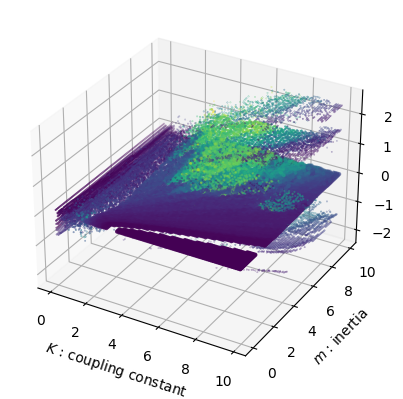

In [54]:
df = pd.read_excel('test 230620.xlsm',index_col=[0,1])
df = pd.read_excel('N = 500 seed = 10 test 230621.xlsm',index_col=[0,1])
# df_Km = df.reset_index(['K','m'])
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# origin = 'lower'
# CS = plt.contourf(KK,MM,df['rMM'].unstack().T, 20, cmap=plt.cm.viridis, origin=origin)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
# plt.colorbar()
Ks = df.reset_index().K
ms = df.reset_index().m
Ss_c0 = df.reset_index()['S c0'].to_numpy()
Ss_c1 = df.reset_index()['S c1'].to_numpy()
Ss_c2 = df.reset_index()['S c2'].to_numpy()
Ss_c3 = df.reset_index()['S c3'].to_numpy()
Ss_c4 = df.reset_index()['S c4'].to_numpy()
Ss_c5 = df.reset_index()['S c5'].to_numpy()

So_c0 = df.reset_index()['S c0 omega'].to_numpy()
So_c1 = df.reset_index()['S c1 omega'].to_numpy()
So_c2 = df.reset_index()['S c2 omega'].to_numpy()
So_c3 = df.reset_index()['S c3 omega'].to_numpy()
So_c4 = df.reset_index()['S c4 omega'].to_numpy()
So_c5 = df.reset_index()['S c5 omega'].to_numpy()

rMM = df.reset_index()['rMM']


# plt.subplot(projection='3d')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Ks,ms,So_c0,c=rMM,s=Ss_c0*0.01)
ax.scatter(Ks,ms,So_c1,c=rMM,s=Ss_c1*0.01)
ax.scatter(Ks,ms,So_c2,c=rMM,s=Ss_c2*0.01)
ax.scatter(Ks,ms,So_c3,c=rMM,s=Ss_c3*0.01)
ax.scatter(Ks,ms,So_c4,c=rMM,s=Ss_c4*0.01)
ax.scatter(Ks,ms,So_c5,c=rMM,s=Ss_c5*0.01)

ax.set_xlabel('$K$ : coupling constant')
ax.set_ylabel('$m$ : inertia')
ax.set_zlabel('cluster phase velocity')
# plt.zlim(-0.)
# plt.scatter(Ks,ms,Ss,Ss)
plt.show()


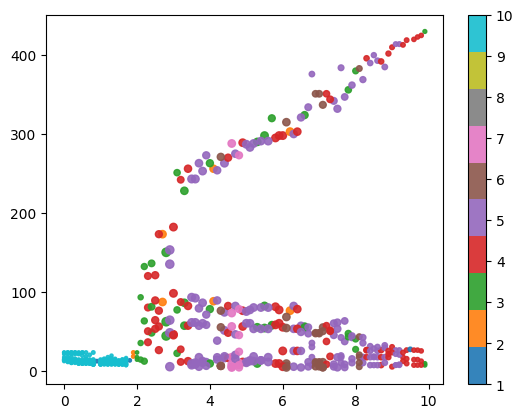

In [64]:
m_idx = 99
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == ms[m_idx]]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.iloc[:,5:15]
cluster_o = df_m.iloc[:,15:25]

len_cluster = (~cluster_o.isna()).sum(axis=1).to_numpy()
plt.scatter(np.ones((10,100))*Ks,cluster_s.to_numpy().T,alpha=0.9,
            c=np.ones((10,100))*(len_cluster),s=50*np.ones((10,100))*rMM,cmap='tab10')
plt.colorbar()

In [67]:
len_cluster = (~cluster_o.isna()).sum(axis=1)
ms = df.reset_index().m.unique()
print(ms[m_idx])
df_m.K.loc[df_m.K>2][len_cluster ==5]

9.899999999999993


2999    2.9
3599    3.5
3699    3.6
3799    3.7
3899    3.8
3999    3.9
4299    4.2
4499    4.4
4799    4.7
5099    5.0
5199    5.1
5299    5.2
5499    5.4
5699    5.6
6399    6.3
6599    6.5
6799    6.7
6899    6.8
7499    7.4
7599    7.5
7699    7.6
7799    7.7
7999    7.9
8299    8.2
8499    8.4
8599    8.5
8699    8.6
8899    8.8
9199    9.1
9299    9.2
Name: K, dtype: float64

## RK4 수정 ensemble version으로

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.get_cluster import C_rsmso,cluster_os
from TO_sim.To_Draw import Draw_avg_vel_r

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
import parmap

In [100]:
seed =10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) 
K = 5
m = 10
t_end = 500
dt =0.1
t = np.arange(0,t_end,dt)
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_init,p_dtheta= 0*omega,p_omega=omega,result_time = 0)#int((t_end)-(600))*int(1/dt))
if m == 0:
        dtheta = np.c_[dtheta[0],dtheta.T].T

In [101]:
N_set = 10
theta_sets = (np.ones((N_set,1))*np.r_[theta_init,np.zeros_like(theta_init)])
omega_sets = (np.ones((N_set,1))*omega)
K_set = np.arange(10).reshape(-1,1)
m_set = np.arange(1,11).reshape(-1,1)

def get_order_parameter_sets(theta,N,N_set):
    ''' get theta and return r and theta'''
    rpsi = 1/N*np.sum(np.exp(1j*theta),axis=1)
    r = np.abs(rpsi).reshape((-1,1))
    psi = np.angle(rpsi).reshape((-1,1))
    return r,psi

def Kuramoto_2nd_mf_sets(theta_sets,t,omega_sets,N,m,K_set,N_set):
    theta,dtheta = theta_sets[:,:N],theta_sets[:,N:2*N]
    r,psi = get_order_parameter_sets(theta,N,N_set)
    ddtheta = (1/m)*(-dtheta + omega_sets + K_set*r*np.sin(psi - theta))
    return np.c_[dtheta,ddtheta]

def Kuramoto_2nd_mf_sets_r(theta_sets,t,omega_sets,N,m,K_set,N_set):
    theta,dtheta = theta_sets[:,:N],theta_sets[:,N:2*N]
    r,psi = get_order_parameter_sets(theta,N,N_set)
    ddtheta = (1/m)*(-dtheta + omega_sets + K_set*r*np.sin(psi - theta))
    return np.c_[dtheta,ddtheta],r

def Kuramoto_1st_mf(theta_sets,t,omega,N,m,K):
    # print("Case m = 0")
    theta= theta_sets[:,:N]
    r,psi = get_order_parameter_sets(theta,N)
    dtheta = omega + K*r*np.sin(psi - theta)
    return np.c_[dtheta,np.zeros(N)]


def Kuramoto_1st_mf_r(theta_sets,t,omega,N,m,K):
    # print("Case m = 0")
    theta= theta_sets[:,:N]
    r,psi = get_order_parameter_sets(theta,N)
    dtheta = omega + K*r*np.sin(psi - theta)
    return np.c_[dtheta,np.zeros(N)],r


In [102]:
N_set = 10
theta_sets = (np.ones((N_set,1))*np.r_[theta_init,np.zeros_like(theta_init)])
omega_sets = (np.ones((N_set,1))*omega)
K_set = np.arange(10).reshape(-1,1)
m_set = np.arange(1,11).reshape(-1,1)
def Kuramoto_2nd_mf_sets(theta_sets,t,omega_sets,N,m,K_set,N_set):
    theta,dtheta = theta_sets[:,:N],theta_sets[:,N:2*N]
    r,psi = get_order_parameter_sets(theta,N,N_set)
    ddtheta = (1/m)*(-dtheta + omega_sets + K_set*r*np.sin(psi - theta))
    return np.c_[dtheta,ddtheta]


In [37]:
theta_,dtheta_ = theta_sets[:,:N],theta_sets[:,N:2*N]
r,psi = get_order_parameter_sets(theta_,N,N_set)
ddtheta_ = (1/m)*(-dtheta_ + omega_sets + K_set*r*np.sin(psi - theta_))


array([[-0.64088027, -0.59591935, -0.4791144 , ...,  0.49306502,
         0.49353021,  0.53598206],
       [-0.64214578, -0.59971821, -0.47704732, ...,  0.4892128 ,
         0.49740903,  0.53997483],
       [-0.64341128, -0.60351707, -0.47498024, ...,  0.48536058,
         0.50128784,  0.54396759],
       ...,
       [-0.64973882, -0.62251135, -0.46464483, ...,  0.46609948,
         0.52068191,  0.56393141],
       [-0.65100433, -0.6263102 , -0.46257774, ...,  0.46224726,
         0.52456073,  0.56792418],
       [-0.65226983, -0.63010906, -0.46051066, ...,  0.45839504,
         0.52843954,  0.57191694]])

In [25]:
n = 5
y = np.zeros((n, *A.shape))
y[0] = A
f = Kuramoto_2nd_mf_sets
args = (omega_sets,N,m,K_set,N_set)
for i in range(n - 1):
    h = t[i + 1] - t[i]
    k1 = f(y[i], t[i], *args)
    k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
    k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
    k4 = f(y[i] + k3 * h, t[i] + h, *args)
    y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

In [60]:
y[4]

array([[ 1.70475788, -3.01120431,  0.83973663, ...,  0.19722601,
         0.19741208,  0.21439282],
       [ 1.70475788, -3.01120431,  0.83973663, ...,  0.19568512,
         0.19896361,  0.21598993],
       [ 1.70475788, -3.01120431,  0.83973663, ...,  0.19414423,
         0.20051514,  0.21758704],
       ...,
       [ 1.70475788, -3.01120431,  0.83973663, ...,  0.18643979,
         0.20827277,  0.22557256],
       [ 1.70475788, -3.01120431,  0.83973663, ...,  0.18489891,
         0.20982429,  0.22716967],
       [ 1.70475788, -3.01120431,  0.83973663, ...,  0.18335802,
         0.21137582,  0.22876678]])

In [12]:
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, *y0.shape))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

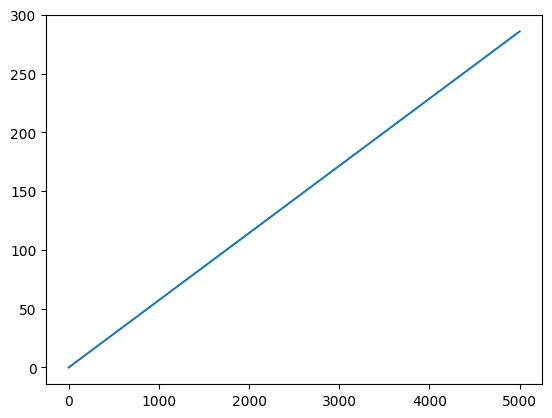

In [115]:
plt.plot(thetas[:,9,-1])

In [79]:
f = Kuramoto_2nd_mf
args = (omega,N,m,K)
result_ = RK4(f,np.r_[theta_init,np.zeros_like(theta_init)],t,args = args)

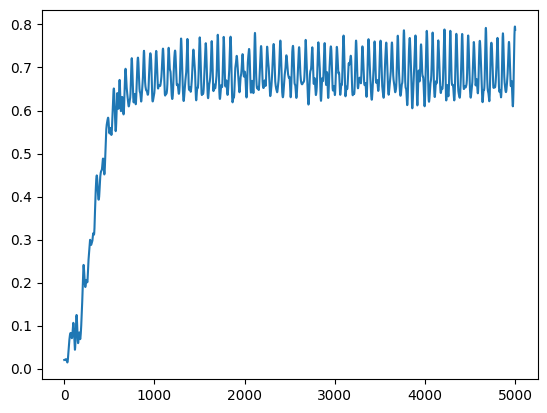

In [86]:
plt.plot(np.abs(np.sum(np.exp(result_[:,:N]*1j),axis=1)/N))

In [13]:
N_set = 20
theta_sets = (np.ones((N_set,1))*np.r_[theta_init,np.zeros_like(theta_init)])
omega_sets = (np.ones((N_set,1))*np.sort(omega))
K_set = np.arange(N_set).reshape(-1,1)

In [14]:
f = Kuramoto_2nd_mf_sets
omega_sets,N,m,K_set,N_set
args = (omega_sets,N,m,K_set,N_set)
thetas = RK4(f,theta_sets,t,args = args)

In [96]:
thetas[:,5,0].shape

(5000,)

In [99]:
abs(np.sum(np.exp(1j*thetas[2,5,:N]))/N)


0.01999916553513436

In [56]:
theta_sets.shape

(10, 1000)

In [64]:
np.arange(10).reshape(-1,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [63]:
1/N*np.sum(np.exp(1j*theta_sets),axis=(1)).reshape((-1,1))

array([[1.00373695+0.01964693j],
       [1.00373695+0.01964693j],
       [1.00373695+0.01964693j],
       [1.00373695+0.01964693j],
       [1.00373695+0.01964693j],
       [1.00373695+0.01964693j],
       [1.00373695+0.01964693j],
       [1.00373695+0.01964693j],
       [1.00373695+0.01964693j],
       [1.00373695+0.01964693j]])

In [103]:
def Sol_Kuramoto_mf2(K,N,m,t_array,p_theta = [], p_dtheta = [], p_omega = [],result_time = 0):
    theta, dtheta, omega  =  p_theta, p_dtheta,p_omega
    if m==0:
        function = Kuramoto_1st_mf_r
    else:
        function = Kuramoto_2nd_mf_r
    result,rs = RK4_r(function,np.r_[theta,dtheta],t_array,args=(omega,N,m,K),result_time=result_time)
    theta_s = result[:,:N]
    dtheta_s = result[:,N:2*N]
    if m == 0:
        dt = t_array[1]-t_array[0]
        dtheta_s = np.diff(theta_s/dt,axis=0)
    return theta_s,dtheta_s,rs

In [104]:
def get_order_parameter(theta,N):
    ''' get theta and return r and theta'''
    rpsi = 1/N*np.sum(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    return r,psi

def get_order_parameter_sets(theta,N,M):
    ''' get theta and return r and theta'''
    rpsi = 1/N*np.sum(np.exp(1j*theta),axis=1)
    r = np.abs(rpsi).reshape((-1,1))
    psi = np.angle(rpsi).reshape((-1,1))
    return r,psi

def Kuramoto_2nd_mf(Theta,t,omega,N,m,K):
    # print(f"Case m = {m}") 
    # theta,dtheta,r,psi = Theta[:N],Theta[N:2*N],Theta[-2],Theta[-1]
    theta,dtheta = Theta[:N],Theta[N:2*N]
    r,psi = get_order_parameter(theta,N)
    ddtheta = (1/m)*(-dtheta + omega + K*r*np.sin(psi - theta))
    return np.r_[dtheta,ddtheta]


In [41]:
np.sin([[1,2,3,4,5],[1,2,3,4,5]])

array([[ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427],
       [ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427]])

In [47]:
thetas.shape

(5000, 10, 1000)

In [105]:
def RK4_r_sets(f, y0, t, args=(),result_time = 0):
    n = len(t) - result_time
    y = np.zeros((n, *y0.shape))
    _,N,_,_,N_set = args
    rs = np.zeros((n+result_time,N_set,1))
    y[0] = y0
    h = t[1] - t[0]
    rs[0] = abs(1/N*np.sum(np.exp(1j*y0[:,:N]),axis=1)).reshape((-1,1))
    y_ = y0
    j = 0
    for i in range(result_time):
        k1,r = f(y_, t, *args)
        k2,_ = f(y_ + k1 * h / 2.0, t + h / 2.0, *args)
        k3,_ = f(y_ + k2 * h / 2.0, t + h / 2.0, *args)
        k4,_ = f(y_ + k3 * h, t + h, *args)
        y_ = y_ + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        rs[j+1] = r
        j+=1
    y[0] = y_
    for i in range(n - 1):
        k1,r = f(y[i], t[i], *args)
        k2,_ = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3,_ = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4,_ = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        rs[j+1] = r
        j+=1
    return y,rs

In [13]:
As = np.zeros((5,10,1))
As[0] = np.arange(10).reshape((-1,1))

In [14]:
np.arange(10).reshape((-1,1)).shape

(10, 1)

In [15]:
np.arange(10).reshape((-1,1)).shape

(10, 1)

In [16]:
np.arange(10).reshape((-1,1))

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [123]:
N_set = 10
theta_sets = (np.ones((N_set,1))*np.r_[theta_init,np.zeros_like(theta_init)])
omega_sets = (np.ones((N_set,1))*np.sort(omega))
K_set = np.arange(N_set).reshape(-1,1)
f = Kuramoto_2nd_mf_sets_r
args = (omega_sets,N,m,K_set,N_set)
Result,rs = RK4_r_sets(f,theta_sets,t,args = args)

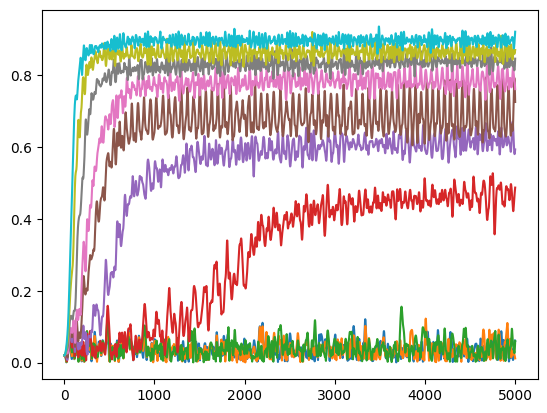

In [126]:
for i in range(N_set):
    plt.plot(rs[:,i])

In [16]:
f = Kuramoto_2nd_mf_sets
args = (omega_sets,N,m,K_set,N_set)
Result = RK4(f,theta_sets,t,args = args)

In [17]:
dthetas = Result[:,:,N:]
thetas = Result[:,:,:N]

In [131]:
thetas[:,0,:].shape

(5000, 500)

In [46]:
r_,psi_ = get_order_parameter_sets(thetas,N,N_set)

In [47]:
r_.shape

(25000000, 1)

In [202]:
rpsi = 1/N*np.sum(np.exp(1j*theta_sets[:,:N]),axis=1)
r = np.abs(rpsi).reshape(1,-1)
psi = np.angle(rpsi).reshape(1,-1)
psi.shape

(1, 20)

In [32]:
def Make_order_parameter(theta_s,N):
    rs = np.abs(np.sum(np.exp(1j*theta_s.T),axis=0))/N
    return rs

In [37]:
thetas.shape

(50000, 10, 500)

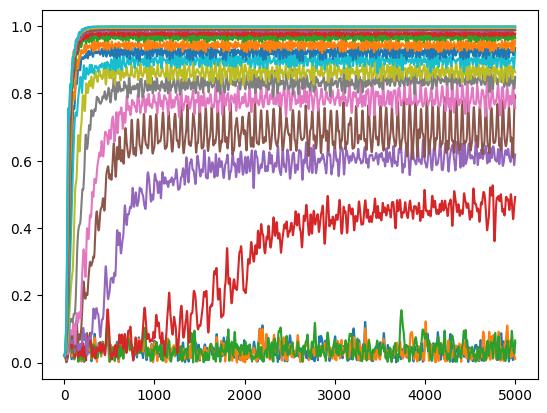

In [18]:
plt.plot((np.abs(np.sum(np.exp(1j*thetas),axis=2))/N))

In [50]:
K

5

In [51]:
f = Kuramoto_2nd_mf
args = (omega,N,m,K)
result = RK4(f,np.r_[theta_init,np.ones_like(theta_init)],t,args = args)
theta = result[:,:N]

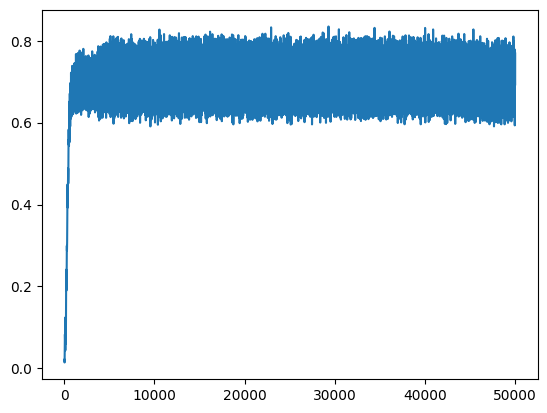

In [53]:
plt.plot((np.abs(np.sum(np.exp(1j*theta),axis=1))/N))


In [72]:
seed =10
N = 20
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) 
K = 5
m = 5
t_end = 5000
dt =0.1
t = np.arange(0,t_end,dt)
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_init,p_dtheta= 0*omega,p_omega=omega,result_time = int((t_end)-(600))*int(1/dt))
if m == 0:
        dtheta = np.c_[dtheta[0],dtheta.T].T

In [76]:
N_set = 10
theta_sets = (np.ones((N_set,1))*np.r_[theta_init,np.zeros_like(theta_init)])
omega_sets = (np.ones((N_set,1))*omega)
K_set = np.arange(10).reshape(-1,1)
m_set = np.arange(1,11).reshape(-1,1)



def Kuramoto_2nd_mf_sets_r(Theta_sets,t,omega_sets,N,m,K_set,N_set):
    theta,dtheta = theta_sets[:,:N],theta_sets[:,N:2*N]
    r,psi = get_order_parameter_sets(theta,N,N_set)
    ddtheta = (1/m)*(-dtheta + omega_sets + K_set*r*np.sin(psi - theta))
    return np.c_[dtheta,ddtheta],r

In [78]:
y0 = np.zeros((10,*theta_sets.shape))
y0[0] = theta_sets
i = 0

In [93]:
theta,dtheta = theta_sets[:,:N],theta_sets[:,N:2*N]
r,psi = get_order_parameter_sets(theta,N,N_set)
ddtheta = (1/m)*(-dtheta + omega_sets + K_set*r*np.sin(psi - theta))
theta_sets = np.c_[dtheta,ddtheta]
y0[i] = theta_sets
i+=1

## sol_Kuramoto_2nd_mf 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.get_cluster import C_rsmso,cluster_os
from TO_sim.To_Draw import Draw_avg_vel_r

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
import parmap

In [2]:
seed =10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) 
K = 5
m = 10
t_end = 500
dt =0.1
t = np.arange(0,t_end,dt)
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_init,p_dtheta= 0*omega,p_omega=omega,result_time = 0)#int((t_end)-(600))*int(1/dt))
if m == 0:
        dtheta = np.c_[dtheta[0],dtheta.T].T

In [3]:
def RK4_r_sets(f, y0, t, args=(),result_time = 0):
    n = len(t) - result_time
    y = np.zeros((n, *y0.shape))
    N_set = len(y0)
    _,N,_,_ = args
    rs = np.zeros((n+result_time,N_set,1))
    y[0] = y0
    h = t[1] - t[0]
    rs[0] = abs(1/N*np.sum(np.exp(1j*y0[:,:N]),axis=1)).reshape((-1,1))
    y_ = y0
    j = 0
    for i in range(result_time):
        k1,r = f(y_, t, *args)
        k2,_ = f(y_ + k1 * h / 2.0, t + h / 2.0, *args)
        k3,_ = f(y_ + k2 * h / 2.0, t + h / 2.0, *args)
        k4,_ = f(y_ + k3 * h, t + h, *args)
        y_ = y_ + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        rs[j+1] = r
        j+=1
    y[0] = y_
    for i in range(n - 1):
        k1,r = f(y[i], t[i], *args)
        k2,_ = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3,_ = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4,_ = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        rs[j+1] = r
        j+=1
    return y,rs

In [7]:
    N_set = 10
    theta_sets = (np.ones((N_set,1))*np.r_[theta_init,np.zeros_like(theta_init)])
    omega_sets = (np.ones((N_set,1))*omega)
    K_set = np.arange(10).reshape(-1,1)
    m_set = np.arange(1,11).reshape(-1,1)

    def get_order_parameter_sets(theta,N):
        ''' get theta and return r and theta'''
        rpsi = 1/N*np.sum(np.exp(1j*theta),axis=1)
        r = np.abs(rpsi).reshape((-1,1))
        psi = np.angle(rpsi).reshape((-1,1))
        return r,psi

    def Kuramoto_2nd_mf_sets(theta_sets,t,omega_sets,N,m,K_set):
        theta,dtheta = theta_sets[:,:N],theta_sets[:,N:2*N]
        r,psi = get_order_parameter_sets(theta,N)
        ddtheta = (1/m)*(-dtheta + omega_sets + K_set*r*np.sin(psi - theta))
        return np.c_[dtheta,ddtheta]

    def Kuramoto_2nd_mf_sets_r(theta_sets,t,omega_sets,N,m,K_set):
        theta,dtheta = theta_sets[:,:N],theta_sets[:,N:2*N]
        r,psi = get_order_parameter_sets(theta,N)
        ddtheta = (1/m)*(-dtheta + omega_sets + K_set*r*np.sin(psi - theta))
        return np.c_[dtheta,ddtheta],r

    def Kuramoto_1st_mf_sets(theta_sets,t,omega,N,m,K_set):
        # print("Case m = 0")
        theta= theta_sets[:,:N]
        r,psi = get_order_parameter_sets(theta,N)
        dtheta = omega + K_set*r*np.sin(psi - theta)
        return np.c_[dtheta,np.zeros(N)]


    def Kuramoto_1st_mf_sets_r(theta_sets,t,omega,N,m,K_set):
        # print("Case m = 0")
        theta= theta_sets[:,:N]
        r,psi = get_order_parameter_sets(theta,N)
        dtheta = omega + K_set*r*np.sin(psi - theta)
        return np.c_[dtheta,np.zeros(N)],r


In [8]:
def Sol_Kuramoto_mf2_sets(K_set,N,m,t_array,p_theta = [], p_dtheta = [], p_omega = [],result_time = 0):
    theta, dtheta, omega  =  p_theta, p_dtheta,p_omega
    if m==0:
        function = Kuramoto_1st_mf_sets_r
    else:
        function = Kuramoto_2nd_mf_sets_r
    result,rs = RK4_r_sets(function,np.c_[theta,dtheta],t_array,args=(omega,N,m,K_set),result_time=result_time)
    theta_s = result[:,:N]
    dtheta_s = result[:,N:2*N]
    if m == 0:
        dt = t_array[1]-t_array[0]
        dtheta_s = np.diff(theta_s/dt,axis=0)
    return theta_s,dtheta_s,rs

In [34]:
K_set = np.arange(0,10,0.1).reshape(-1,1)
m = 1
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
N_set = len(K_set)
theta_sets = (np.ones((N_set,1))*theta_init)
omega_sets = (np.ones((N_set,1))*omega)


omega = np.sort(omega) 
m = 6
t_end = 5000
dt =0.1
t = np.arange(0,t_end,dt)
theta, dtheta,rs = Sol_Kuramoto_mf2_sets(K_set,N=N,m=m,t_array=t,p_theta=theta_sets,p_dtheta= omega_sets,p_omega=omega_sets,result_time=int((5000-100)*10))
if m == 0:
        dtheta = np.c_[dtheta[0],dtheta.T].T

In [22]:
K_set = np.arange(0,10,0.1).reshape(-1,1)

In [38]:
K_lin = (K_set.reshape(-1))/(np.max(K_set)-np.min(K_set))
K_color = plt.cm.Blues_r(K_lin)
RS = rs.T[0].T

In [16]:
RS[-500:].shape

(500, 100)

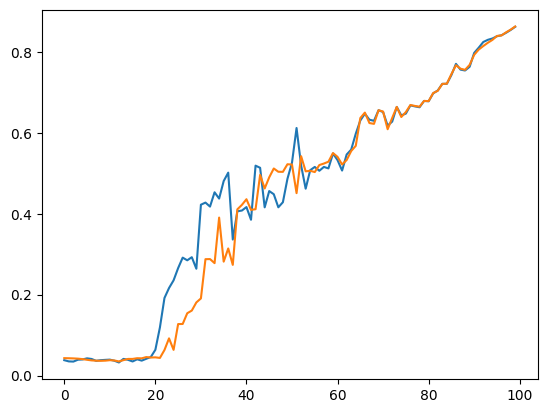

In [18]:
plt.plot(np.mean(RS[-500:],axis=0))
plt.plot(np.mean(RS[4500:5000],axis=0))

In [51]:
r_c = np.cumsum(RS,axis=0)
sum_time = 5000
t_sum = t[sum_time:]
avg_r = (r_c[sum_time:]-r_c[:-sum_time])/sum_time

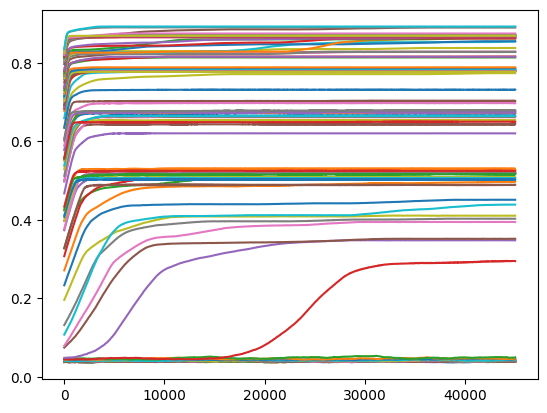

In [52]:
plt.plot(avg_r);

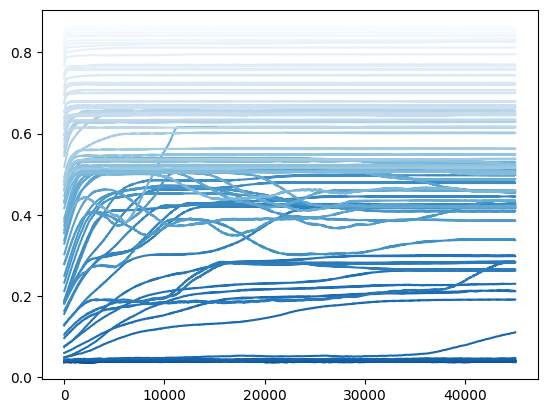

In [33]:
ln = plt.plot(avg_r)
for i,l in enumerate(ln):
    l.set_color(K_color[i])

ValueError: array([[0.96862745, 0.98431373, 1.        , 1.        ],
       [0.96247597, 0.98037678, 0.99803153, 1.        ],
       [0.95324875, 0.97447136, 0.99507882, 1.        ],
       [0.94709727, 0.97053441, 0.99311034, 1.        ],
       [0.93787005, 0.96462899, 0.99015763, 1.        ],
       [0.93171857, 0.96069204, 0.98818916, 1.        ],
       [0.92249135, 0.95478662, 0.98523645, 1.        ],
       [0.91326413, 0.9488812 , 0.98228374, 1.        ],
       [0.90711265, 0.94494425, 0.98031526, 1.        ],
       [0.89788543, 0.93903883, 0.97736255, 1.        ],
       [0.89173395, 0.93510188, 0.97539408, 1.        ],
       [0.88250673, 0.92919646, 0.97244137, 1.        ],
       [0.87327951, 0.92329104, 0.96948866, 1.        ],
       [0.86726644, 0.91935409, 0.96752018, 1.        ],
       [0.8584083 , 0.91344867, 0.96456747, 1.        ],
       [0.85250288, 0.90951173, 0.962599  , 1.        ],
       [0.84364475, 0.90360631, 0.95964629, 1.        ],
       [0.83773933, 0.89966936, 0.95767782, 1.        ],
       [0.8288812 , 0.89376394, 0.95472511, 1.        ],
       [0.82002307, 0.88785852, 0.9517724 , 1.        ],
       [0.81411765, 0.88392157, 0.94980392, 1.        ],
       [0.80525952, 0.87801615, 0.94685121, 1.        ],
       [0.79935409, 0.8740792 , 0.94488274, 1.        ],
       [0.79049596, 0.86817378, 0.94193003, 1.        ],
       [0.78163783, 0.86226836, 0.93897732, 1.        ],
       [0.77524029, 0.85830065, 0.9368243 , 1.        ],
       [0.76047674, 0.85202614, 0.93165705, 1.        ],
       [0.75063437, 0.84784314, 0.92821223, 1.        ],
       [0.73587082, 0.84156863, 0.92304498, 1.        ],
       [0.72602845, 0.83738562, 0.91960015, 1.        ],
       [0.7112649 , 0.83111111, 0.91443291, 1.        ],
       [0.69650135, 0.8248366 , 0.90926567, 1.        ],
       [0.68665898, 0.82065359, 0.90582084, 1.        ],
       [0.67189542, 0.81437908, 0.90065359, 1.        ],
       [0.66205306, 0.81019608, 0.89720877, 1.        ],
       [0.6472895 , 0.80392157, 0.89204152, 1.        ],
       [0.63252595, 0.79764706, 0.88687428, 1.        ],
       [0.62268358, 0.79346405, 0.88342945, 1.        ],
       [0.60470588, 0.78397539, 0.87913879, 1.        ],
       [0.59215686, 0.77708574, 0.87643214, 1.        ],
       [0.57333333, 0.76675125, 0.87237216, 1.        ],
       [0.5545098 , 0.75641676, 0.86831219, 1.        ],
       [0.54196078, 0.7495271 , 0.86560554, 1.        ],
       [0.52313725, 0.73919262, 0.86154556, 1.        ],
       [0.51058824, 0.73230296, 0.85883891, 1.        ],
       [0.49176471, 0.72196847, 0.85477893, 1.        ],
       [0.47921569, 0.71507882, 0.85207228, 1.        ],
       [0.46039216, 0.70474433, 0.8480123 , 1.        ],
       [0.44156863, 0.69440984, 0.84395233, 1.        ],
       [0.42901961, 0.68752018, 0.84124567, 1.        ],
       [0.41204152, 0.6771857 , 0.83626298, 1.        ],
       [0.40195309, 0.67029604, 0.83232603, 1.        ],
       [0.38682045, 0.65996155, 0.82642061, 1.        ],
       [0.37168781, 0.64962707, 0.82051519, 1.        ],
       [0.36159938, 0.64273741, 0.81657824, 1.        ],
       [0.34646674, 0.63240292, 0.81067282, 1.        ],
       [0.33637832, 0.62551326, 0.80673587, 1.        ],
       [0.32124567, 0.61517878, 0.80083045, 1.        ],
       [0.31115725, 0.60828912, 0.7968935 , 1.        ],
       [0.29602461, 0.59795463, 0.79098808, 1.        ],
       [0.28089196, 0.58762015, 0.78508266, 1.        ],
       [0.27080354, 0.58073049, 0.78114571, 1.        ],
       [0.25628604, 0.57001153, 0.7751634 , 1.        ],
       [0.24816609, 0.56189158, 0.77098039, 1.        ],
       [0.23598616, 0.54971165, 0.76470588, 1.        ],
       [0.22380623, 0.53753172, 0.75843137, 1.        ],
       [0.21568627, 0.52941176, 0.75424837, 1.        ],
       [0.20350634, 0.51723183, 0.74797386, 1.        ],
       [0.19538639, 0.50911188, 0.74379085, 1.        ],
       [0.18320646, 0.49693195, 0.73751634, 1.        ],
       [0.17102653, 0.48475202, 0.73124183, 1.        ],
       [0.16290657, 0.47663206, 0.72705882, 1.        ],
       [0.15072664, 0.46445213, 0.72078431, 1.        ],
       [0.14260669, 0.45633218, 0.71660131, 1.        ],
       [0.13042676, 0.44415225, 0.7103268 , 1.        ],
       [0.12402922, 0.4362476 , 0.70442138, 1.        ],
       [0.114802  , 0.42443676, 0.69519416, 1.        ],
       [0.10557478, 0.41262591, 0.68596694, 1.        ],
       [0.0994233 , 0.40475202, 0.67981546, 1.        ],
       [0.09019608, 0.39294118, 0.67058824, 1.        ],
       [0.0840446 , 0.38506728, 0.66443676, 1.        ],
       [0.07481738, 0.37325644, 0.65520953, 1.        ],
       [0.06559016, 0.3614456 , 0.64598231, 1.        ],
       [0.05943868, 0.3535717 , 0.63983083, 1.        ],
       [0.05021146, 0.34176086, 0.63060361, 1.        ],
       [0.04405998, 0.33388697, 0.62445213, 1.        ],
       [0.03483276, 0.32207612, 0.61522491, 1.        ],
       [0.03137255, 0.31409458, 0.60648981, 1.        ],
       [0.03137255, 0.30191465, 0.58840446, 1.        ],
       [0.03137255, 0.28973472, 0.57031911, 1.        ],
       [0.03137255, 0.28161476, 0.55826221, 1.        ],
       [0.03137255, 0.26943483, 0.54017686, 1.        ],
       [0.03137255, 0.26131488, 0.52811995, 1.        ],
       [0.03137255, 0.24913495, 0.5100346 , 1.        ],
       [0.03137255, 0.23695502, 0.49194925, 1.        ],
       [0.03137255, 0.22883506, 0.47989235, 1.        ],
       [0.03137255, 0.21665513, 0.461807  , 1.        ],
       [0.03137255, 0.20853518, 0.4497501 , 1.        ],
       [0.03137255, 0.19635525, 0.43166474, 1.        ],
       [0.03137255, 0.18823529, 0.41960784, 1.        ]]) is not a valid value for color

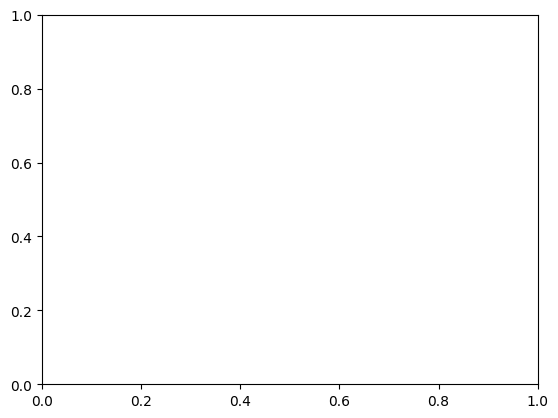

In [63]:
plt.plot(rs[:,:,0]);

## set algorithm check